## Final Task:
This is your final evaluation for the project. As decided, we will be predicting images of people into three classes: `without_mask`, `mask_weared_incorrect` and `with_mask`. 

In [1]:
import tensorflow as tf

### Loading the dataset
Make a copy of the dataset given to you in your Google Drive (keep it outside, don't put it in any folder to avoid inconvenience). Ensure it is named as `Mask_Dataset` or change the path (the variable `data_dir`) accordingly.

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pathlib

path='/content/drive/MyDrive/Mask_Dataset/'
data_dir = pathlib.Path(path)
print(data_dir)

/content/drive/MyDrive/Mask_Dataset


### Know the Dataset
Most of the code is written for you as you aren't used to these libraries. You are to go through the documentation for your benefit.

In [4]:
# Print image count
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)
with_mask = list(data_dir.glob('with_mask/*'))
with_inmask = list(data_dir.glob('mask_weared_incorrect/*'))
without_mask = list(data_dir.glob('without_mask/*'))

#for storing the data appropriately, let's make a dictionary
mask_images_dict = {
    'with_mask': list(data_dir.glob('with_mask/*')),
    'with_inmask': list(data_dir.glob('mask_weared_incorrect/*')),
    'without_mask': list(data_dir.glob('without_mask/*')),}
mask_labels_dict = {
    'with_mask': 1,
    'with_inmask': 2,
    'without_mask': 3,}

8982


In [5]:
# Print Output Labels
import os
output_classes = os.listdir(data_dir)
print(output_classes)

['without_mask', 'mask_weared_incorrect', 'with_mask']


[2994, 2994, 2994]


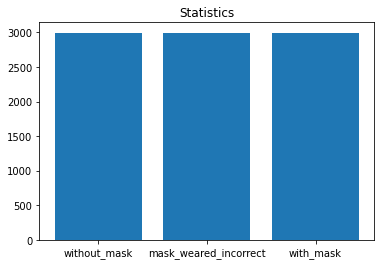

In [6]:
# Plot count of each ouput label
import matplotlib.pyplot as plt

count=[]
for label in output_classes:
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir)
  count.append(len(im_count))

print(count)

plt.bar(output_classes,count)
plt.title("Statistics")
plt.show()

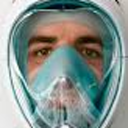

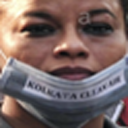

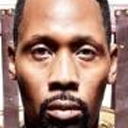

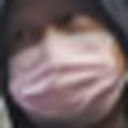

In [7]:
# Check some sample images (Use of cv2)
import cv2
from google.colab.patches import cv2_imshow

# Your code
img1=cv2.imread('/content/drive/MyDrive/Mask_Dataset/with_mask/1.png',1)
cv2_imshow(img1)
print('\n')
img2=cv2.imread('/content/drive/MyDrive/Mask_Dataset/mask_weared_incorrect/1.png',1)
cv2_imshow(img2)
print('\n')
img3=cv2.imread('/content/drive/MyDrive/Mask_Dataset/without_mask/1.png',1)
cv2_imshow(img3)
#another way to read and display images
print('\n')
image=cv2.imread(str(with_mask[0]),1)
cv2_imshow(image)

In [8]:
# Check shape of the images in your dataset. This will be helpful while specifying input_shape in your Transfer Learning Model
height1, width1, channels1 = img1.shape
print(height1, width1, channels1)

height2, width2, channels2 = img2.shape
print(height2, width2, channels2)

height3, width3, channels3 = img3.shape
print(height3, width3, channels3)

128 128 3
128 128 3
128 128 3


In [9]:
# If the shape is variable, reshape to a common size 
# If it is same, prove it

In [10]:
# Check if all the images have same shape, else you need to resize them to some common size
# The code provided as it is above in the template will help
images_with_mask = []
for filename in os.listdir('/content/drive/MyDrive/Mask_Dataset/with_mask'):
  img = cv2.imread(os.path.join('/content/drive/MyDrive/Mask_Dataset/with_mask',filename))
  if img is not None:
    images_with_mask.append(img)

images_with_inmask = []
for filename in os.listdir('/content/drive/MyDrive/Mask_Dataset/mask_weared_incorrect'):
  img = cv2.imread(os.path.join('/content/drive/MyDrive/Mask_Dataset/mask_weared_incorrect',filename))
  if img is not None:
    images_with_inmask.append(img)

images_without_mask = []
for filename in os.listdir('/content/drive/MyDrive/Mask_Dataset/without_mask'):
  img = cv2.imread(os.path.join('/content/drive/MyDrive/Mask_Dataset/without_mask',filename))
  if img is not None:
    images_without_mask.append(img)

flag_with_mask = True
for image in images_with_mask:
  height, width, channels = image.shape
  if(height != 128):
    flag_with_mask = False
  if(width != 128):
    flag_with_mask = False

flag_with_inmask = True
for image in images_with_inmask:
  height, width, channels = image.shape
  if(height != 128):
    flag_with_inmask = False
  if(width != 128):
    flag_with_inmask = False

flag_without_mask = True
for image in images_without_mask:
  height, width, channels = image.shape
  if(height != 128):
    flag_without_mask = False
  if(width != 128):
    flag_without_mask = False

if(flag_with_mask==flag_without_mask==flag_with_inmask):
  print("Yes, All the pictures have the same dimension")
else:
  print("No, All the pictures do not have the same dimension")

Yes, All the pictures have the same dimension


In [11]:
#breaking the dataset
import numpy as np
X, Y = [], []
for filename, images in mask_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        X.append(img)
        Y.append(mask_labels_dict[filename])
X = np.array(X)
Y = np.array(Y)

#splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
X[0].shape

(128, 128, 3)

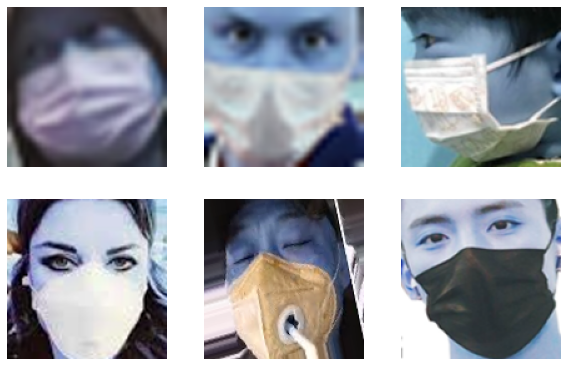

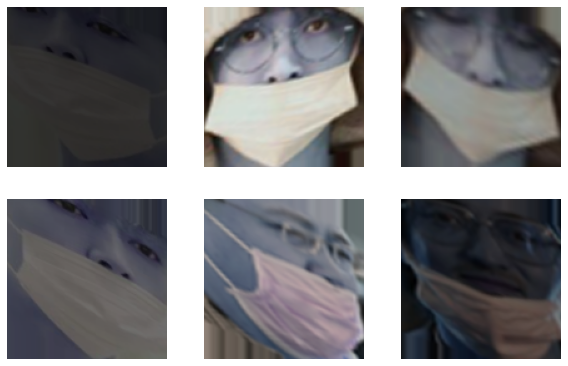

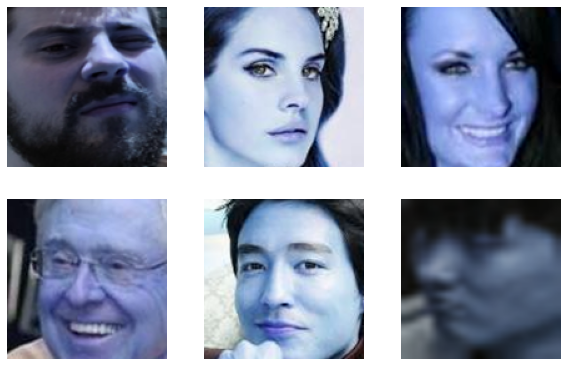

In [12]:
# Anything else you want to plot/experiment

plt.figure(figsize=(10, 10))
for i in range(6):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(images_with_mask[i])
  plt.axis("off")
print('\n')

plt.figure(figsize=(10, 10))
for i in range(6):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(images_with_inmask[i])
  plt.axis("off")
print('\n')

plt.figure(figsize=(10, 10))
for i in range(6):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(images_without_mask[i])
  plt.axis("off")

### Model Definition
Choose a model for Transfer Learning (You may also experment with multiple models and keep all of them in this notebook)

In [13]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [14]:
# Choose and define base model
model = Sequential()
img_size=(128,128)
img_shape = img_size + (3,)
base_model = tf.keras.applications.ResNet50(include_top=False,input_shape=img_shape,
                                               classes=3,
                                               classifier_activation="softmax",
                                               weights='imagenet')


In [15]:
# Print base model summary and have a look at the layers
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']      

In [16]:
# As we're using Transfer Learning, you do not need to train all the layers. Freeze all of the layers or train some layers (experiment)
for layer in base_model.layers:
  layer.trainable=False

model.add(base_model)
model.add(layers.Rescaling(1./255))
model.add(layers.Conv2D(32,(5,5),activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(5,5),activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 rescaling (Rescaling)       (None, 4, 4, 2048)        0         
                                                                 
 conv2d (Conv2D)             (None, 4, 4, 32)          1638432   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 64)         0         
 2D)                                                    

In [17]:
# Append Fully connected/custom Conv2D/Dropout/MaxPooling layers to the base model
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))



In [18]:
# Add the final output layer

model.add(layers.Dense(3, activation='softmax'))

In [19]:
# Print your model's summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 rescaling (Rescaling)       (None, 4, 4, 2048)        0         
                                                                 
 conv2d (Conv2D)             (None, 4, 4, 32)          1638432   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 64)         0         
 2D)                                                    

In [20]:
# Compile you model (set the parameters like loss/optimizers/metrics)
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'])


### Data Augmentation and Pre-processing
Augment the data. You may also try dyanamic augmentation using [`tf.keras.preprocessing.image.ImageDataGenerator `](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).   
You may use [`tf.keras.applications.vgg16.preprocess_input`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input)(or some other base model's utility) for pre-processing (can also be passed as a parameter to `ImageDataGenerator`)

In [21]:
from keras.applications.vgg16 import preprocess_input # Change according to your base model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Your code 
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
# Anything else you wish to try

### Training and Validation Dataset  
Split the dataset into training and validation (We'll be looking for your validation accuracy, assume we are using complete dataset for now). 

Hint: `flow_from_directory` used with `ImageDataGenerator` will simplify things for you.

In [23]:
# Your code
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Mask_Dataset',
        target_size=(128, 128))
validation_generator = val_datagen.flow_from_directory(
        '/content/drive/MyDrive/Mask_Dataset',
        target_size=(128, 128))



Found 8982 images belonging to 3 classes.
Found 8982 images belonging to 3 classes.


### Training  
Train your model for some epochs and plot the graph. Try and save your best model. Experiment with the parameters of `model.fit`

In [24]:
from keras.callbacks import ModelCheckpoint
# ModelCheckpoint is helpful to save the model giving best results (brownie points)
filepath='content/drive/MyDrive/checkpoint-{epoch:02d}.h5'
checkpoint=ModelCheckpoint(filepath,monitor='accuracy',verbose=1,save_best_only=True,mode='max')
history =model.fit(
         train_generator,
         epochs=10,
         validation_data=validation_generator,callbacks=[checkpoint])

Epoch 1/10
281/281 [==============================] - ETA: 0s - loss: 0.9748 - accuracy: 0.4541
Epoch 1: accuracy improved from -inf to 0.45413, saving model to content/drive/MyDrive/checkpoint-01.h5
281/281 [==============================] - 1060s 4s/step - loss: 0.9748 - accuracy: 0.4541 - val_loss: 0.8089 - val_accuracy: 0.5493
Epoch 2/10
281/281 [==============================] - ETA: 0s - loss: 0.8006 - accuracy: 0.5861
Epoch 2: accuracy improved from 0.45413 to 0.58606, saving model to content/drive/MyDrive/checkpoint-02.h5
281/281 [==============================] - 1063s 4s/step - loss: 0.8006 - accuracy: 0.5861 - val_loss: 0.7353 - val_accuracy: 0.6350
Epoch 3/10
281/281 [==============================] - ETA: 0s - loss: 0.7359 - accuracy: 0.6500
Epoch 3: accuracy improved from 0.58606 to 0.64997, saving model to content/drive/MyDrive/checkpoint-03.h5
281/281 [==============================] - 1052s 4s/step - loss: 0.7359 - accuracy: 0.6500 - val_loss: 0.6249 - val_accuracy: 0.

In [25]:
!ls {os.path.dirname(filepath)}

checkpoint-01.h5  checkpoint-04.h5  checkpoint-07.h5  checkpoint-10.h5
checkpoint-02.h5  checkpoint-05.h5  checkpoint-08.h5
checkpoint-03.h5  checkpoint-06.h5  checkpoint-09.h5


### Evaluate the performance

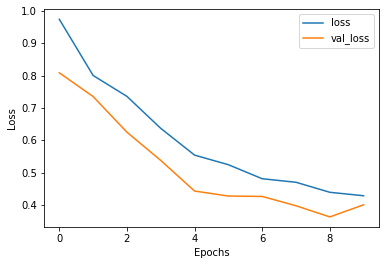

In [26]:
# Plot training & validation loss/accuracy values
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')



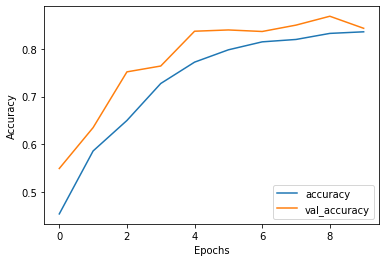

In [27]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# print classification report

predictions = model(X_test)
Y_pred = np.argmax(predictions, axis=1)
target_names = ['empty','with_mask', 'mask_weared_incorrect', 'without_mask']
print(classification_report(Y_test, Y_pred, target_names=target_names))


                       precision    recall  f1-score   support

                empty       0.00      0.00      0.00         0
            with_mask       0.34      0.96      0.50       760
mask_weared_incorrect       0.01      0.00      0.00       751
         without_mask       0.00      0.00      0.00       735

             accuracy                           0.33      2246
            macro avg       0.09      0.24      0.13      2246
         weighted avg       0.12      0.33      0.17      2246



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
# Use the classification report to print precision, recall, f1-score for the three classes(optional, brownie points)